In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../merged_nfl.csv")

In [4]:
df

,Unnamed: 0,Team_df2_x,Player_df2_x,Wikipedia_Link,Pageviews,ID,Player_df1_x,Until,G,GS,...,DROY,AP1,SB,IG,Player_df1_y,Player_df2_y,Match Score,Team_df2_y,df2_index,df1_index
0,1371,Arizona Cardinals,Kyler Murray,https://en.wikipedia.org/wiki/Kyler_Murray,845475.0,1696,Kyler Murray,2024,82,82,...,0,0,0,NaN,Kyler Murray,Kyler Murray,100.000000,Arizona Cardinals,0,1695
1,1948,Arizona Cardinals,Clayton Tune,https://en.wikipedia.org/wiki/Clayton_Tune,56850.0,2413,Clayton Tune,2024,13,1,...,0,0,0,NaN,Clayton Tune,Clayton Tune,100.000000,Arizona Cardinals,1,2412
2,154,Arizona Cardinals,Trey Benson,https://en.wikipedia.org/wiki/Trey_Benson,110208.0,187,Trey Benson,2024,13,1,...,0,0,0,NaN,Trey Benson,Trey Benson,100.000000,Arizona Cardinals,2,186
3,324,Arizona Cardinals,Michael Carter,https://en.wikipedia.org/wiki/Michael_Carter_(...,50197.0,384,Michael Carter,2024,48,22,...,0,0,0,NaN,Michael Carter,Michael Carter,100.000000,Arizona Cardinals,3,383
4,377,Arizona Cardinals,James Conner,https://en.wikipedia.org/wiki/James_Conner_(Am...,198361.0,460,James Conner,2024,107,81,...,0,0,0,NaN,James Conner,James Conner,100.000000,Arizona Cardinals,4,459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,1706,Washington Commanders,Trent Scott,https://en.wikipedia.org/wiki/Trent_Scott,21989.0,2104,Trenton Scott,2024,88,23,...,0,0,0,NaN,Trenton Scott,Trent Scott,91.666667,Washington Commanders,2448,2103
2186,1709,Washington Commanders,Austin Seibert,https://en.wikipedia.org/wiki/Austin_Seibert,91538.0,2108,Austin Seibert,2024,40,0,...,0,0,0,NaN,Austin Seibert,Austin Seibert,100.000000,Washington Commanders,2449,2107
2187,1999,Washington Commanders,Mykal Walker,https://en.wikipedia.org/wiki/Mykal_Walker,16624.0,2476,Mykal Walker,2024,74,25,...,0,0,0,NaN,Mykal Walker,Mykal Walker,100.000000,Washington Commanders,2450,2475
2188,2042,Washington Commanders,Tress Way,https://en.wikipedia.org/wiki/Tress_Way,66983.0,2527,Tress Way,2024,179,0,...,0,0,0,NaN,Tress Way,Tress Way,100.000000,Washington Commanders,2451,2526


In [5]:
df.columns

Index(['Unnamed: 0', 'Team_df2_x', 'Player_df2_x', 'Wikipedia_Link',
       'Pageviews', 'ID', 'Player_df1_x', 'Until', 'G', 'GS', 'Cmp', 'PaAtt',
       'Cmp%', 'PaYds', 'PaTD', 'IntO', 'Rate', 'SkO', 'QBWin', 'GWD', 'RuAtt',
       'RuYds', 'RuY/A', 'RuTD', 'RuY/G', 'Tgt', 'Rec', 'RecYds', 'Y/Rec',
       'RecTD', 'RecY/G', 'FG', 'FG%', '2PM', 'Sfty', 'Pts', 'FantPts', 'SkD',
       'Solo', 'Ast', 'TFL', 'QBHit', 'IntD', 'Pick6', 'PaDef', 'Fmb', 'FR',
       'Scoop6', 'FF', 'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds', 'Pos',
       'Team_df1', 'MVP', 'OPOY', 'DPOY', 'OROY', 'DROY', 'AP1', 'SB', 'IG',
       'Player_df1_y', 'Player_df2_y', 'Match Score', 'Team_df2_y',
       'df2_index', 'df1_index'],
      dtype='object')

In [6]:
drop_columns = [
    'Unnamed: 0', 
    # 'Team_df2_x', 
    # 'Player_df1_y',
    'Player_df2_x',
    'Wikipedia_Link',
    'ID', 
    'Player_df1_x', 
    'Until',
    # 'Pos', 
    'Team_df1',
    'Player_df2_y', 
    'Match Score', 
    'Team_df2_y', 
    'df2_index', 
    'df1_index',
    'IG'
    ]

In [7]:
df_dropped = df.drop(drop_columns, axis=1)

In [8]:
df_dropped = df_dropped.rename(columns={
    "Player_df1_y": "Player", 
    "Team_df2_x": "Team"
    })


In [9]:
from sklearn.preprocessing import StandardScaler

# Choose the stat columns + pageviews
features = [x for x in df_dropped.columns if x not in ['Player', 'Team', "Pos"]]

# Normalize within each position group
normalized_dfs = []

for pos, group in df.groupby('Pos'):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(group[features])
    norm_df = pd.DataFrame(scaled, columns=features, index=group.index)
    norm_df['Pos'] = pos
    normalized_dfs.append(norm_df)

df_normalized = pd.concat(normalized_dfs)


/home/bowenbv/miniconda3/envs/knowball/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/bowenbv/miniconda3/envs/knowball/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/bowenbv/miniconda3/envs/knowball/lib/python3.11/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/home/bowenbv/miniconda3/envs/knowball/lib/python3.11/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/bowenbv/miniconda3/envs/knowball/lib/python3.11/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample

In [10]:
df_dropped

,Team,Pageviews,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,IntO,...,RetYds,Pos,MVP,OPOY,DPOY,OROY,DROY,AP1,SB,Player
0,Arizona Cardinals,845475.0,82,82,1864,2780,67.1,19498,115,57,...,0,QB,0,0,0,1,0,0,0,Kyler Murray
1,Arizona Cardinals,56850.0,13,1,14,23,60.9,70,0,2,...,0,QB,0,0,0,0,0,0,0,Clayton Tune
2,Arizona Cardinals,110208.0,13,1,0,0,NaN,0,0,0,...,0,RB,0,0,0,0,0,0,0,Trey Benson
3,Arizona Cardinals,50197.0,48,22,0,0,NaN,0,0,0,...,0,RB,0,0,0,0,0,0,0,Michael Carter
4,Arizona Cardinals,198361.0,107,81,0,0,NaN,0,0,0,...,0,RB,0,0,0,0,0,0,0,James Conner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Washington Commanders,21989.0,88,23,0,0,NaN,0,0,0,...,0,LT,0,0,0,0,0,0,0,Trenton Scott
2186,Washington Commanders,91538.0,40,0,0,0,NaN,0,0,0,...,0,K,0,0,0,0,0,0,0,Austin Seibert
2187,Washington Commanders,16624.0,74,25,0,0,NaN,0,0,0,...,0,LB,0,0,0,0,0,0,0,Mykal Walker
2188,Washington Commanders,66983.0,179,0,2,2,100.0,38,0,0,...,0,P,0,0,0,0,0,0,0,Tress Way


In [11]:
df_dropped["Pos"].unique()

array(['QB', 'RB', 'WR', 'TE', 'OL', 'G', 'C', 'CB', 'LT', 'RDT', 'DT',
       'DL', 'ROLB', 'DB', 'LB', 'OLB', 'S', 'RCB', 'LS', 'P', 'K', 'RT',
       'RG', 'LG', 'T', 'LDT', 'DE', 'FS', 'LCB/RCB', 'RDE', 'OT', 'NT',
       'RILB', 'LILB', 'FB', 'LDE', 'LCB', 'OG', 'SS', 'MLB', 'LLB',
       'LOLB', 'RLB', 'FS/SS', 'LDE/RDE', 'RCB/LCB', 'ROLB/LILB', 'LT/RT',
       nan], dtype=object)

In [12]:
df_dropped = df_dropped.rename(columns={
    "Player_df1_y": "Player", 
    "Team_df2_x": "Team"
    })


In [16]:
# Compute mean pageviews per cluster *within each position*
cluster_popularity = df_normalized.groupby(['Pos', 'Cluster'])['Pageviews'].mean().reset_index()

# Find the most popular cluster for each position
most_popular_clusters = cluster_popularity.loc[cluster_popularity.groupby('Pos')['Pageviews'].idxmax()]


KeyError: 'Cluster'

In [ ]:
cluster_assignments = []

for pos, group in df_normalized.groupby("Pos"):
    group = group.fillna(0)

    if len(group) < 3:
        continue

    k = min(3, len(group))  # or use elbow method later
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(group[features])

    labels = kmeans.labels_

    for idx, label in zip(group.index, labels):
        cluster_assignments.append({'Index': idx, 'Cluster': label})

    for i, centroid in enumerate(kmeans.cluster_centers_):
        centroids.append({
            'Pos': pos,
            'Cluster': i,
            **{f: v for f, v in zip(features, centroid)}
        })

# Merge cluster assignments into df_normalized
cluster_df = pd.DataFrame(cluster_assignments).set_index("Index")
df_normalized['Cluster'] = cluster_df['Cluster']


In [ ]:
# Assuming meta_kmeans is done and centroids_df has 'MetaCluster' column
# Merge MetaCluster info back to df_normalized
def get_meta_cluster(row):
    match = centroids_df[
        (centroids_df['Pos'] == row['Pos']) & 
        (centroids_df['Cluster'] == row['Cluster'])
    ]
    if not match.empty:
        return match['MetaCluster'].values[0]
    return None

df_normalized['MetaCluster'] = df_normalized.apply(get_meta_cluster, axis=1)


In [ ]:
# Get average pageviews by meta-cluster
meta_means = df_normalized.groupby('MetaCluster')['Pageviews'].mean().rename('Expected_Pageviews')

# Join back
df_normalized = df_normalized.join(meta_means, on='MetaCluster')

# Obscurity = expected - actual
df_normalized['Obscurity'] = df_normalized['Expected_Pageviews'] - df_normalized['Pageviews']


In [ ]:
from scipy.special import expit  # sigmoid

df_normalized['ObscurityScore'] = expit(df_normalized['Obscurity'] / 1000)  # adjust scale as needed


In [ ]:
df_normalized.sort

,Pageviews,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,IntO,Rate,...,OROY,DROY,AP1,SB,Pos,Cluster,MetaCluster,Expected_Pageviews,Obscurity,ObscurityScore
20,-0.289342,0.217197,-0.031005,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.0,0.000000,-0.378968,C,2.0,1.0,-0.046976,0.242366,0.500061
165,1.289736,-0.192204,0.213870,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.0,0.000000,-0.378968,C,2.0,1.0,-0.046976,-1.336712,0.499666
229,0.625839,1.343048,1.492661,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.0,0.000000,-0.378968,C,2.0,1.0,-0.046976,-0.672815,0.499832
281,-0.399158,0.626597,0.703620,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.0,0.000000,1.431658,C,2.0,1.0,-0.046976,0.352182,0.500088
288,-0.842620,-1.420406,-1.119337,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,...,0.000000,0.0,0.000000,-0.378968,C,0.0,1.0,-0.046976,0.795644,0.500199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,-0.489427,0.406383,-0.412257,1.128241,1.488279,0.04279,0.017638,-0.193892,-0.150756,-0.535098,...,-0.086387,0.0,-0.128885,-0.318896,WR,2.0,1.0,-0.046976,0.442450,0.500111
2168,-0.207301,0.999348,0.272548,-0.250153,-0.325876,NaN,-0.239780,-0.193892,-0.150756,NaN,...,-0.086387,0.0,-0.128885,-0.318896,WR,2.0,1.0,-0.046976,0.160324,0.500040
2170,-0.409863,1.888796,0.786152,1.128241,1.488279,0.04279,2.527464,3.296159,-0.150756,1.176430,...,-0.086387,0.0,-0.128885,-0.318896,WR,0.0,1.0,-0.046976,0.362887,0.500091
2183,-0.105039,0.505210,0.272548,-0.250153,-0.325876,NaN,-0.239780,-0.193892,-0.150756,NaN,...,-0.086387,0.0,-0.128885,-0.318896,WR,2.0,1.0,-0.046976,0.058063,0.500015


In [ ]:
df_sorted = df_normalized.sort_values(by='ObscurityScore', ascending=False)


In [ ]:
df_sorted.head(20)


,Pageviews,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,IntO,Rate,...,OROY,DROY,AP1,SB,Pos,Cluster,MetaCluster,Expected_Pageviews,Obscurity,ObscurityScore
874,-0.710251,1.672303,1.396908,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,0.000000,0.000000,-0.577350,RLB,0.0,0.0,0.882678,1.592929,0.500398
876,-0.643101,2.054319,1.371651,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,0.000000,-0.316228,-0.316228,RDE,2.0,0.0,0.882678,1.525779,0.500381
2137,-0.506551,1.826828,1.855312,-0.408248,-0.408248,NaN,-0.408248,-0.408248,0.0,NaN,...,0.0,0.000000,-0.408248,0.000000,SS,1.0,0.0,0.882678,1.389229,0.500347
2042,-0.475794,1.829395,0.191646,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.358472,0.500340
666,-0.428528,-0.121208,-0.172248,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.311206,0.500328
1144,-0.398528,0.396921,0.838569,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.281206,0.500320
2116,-0.366345,1.859874,1.889818,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.249023,0.500312
1409,-0.358999,2.286568,1.566357,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.241677,0.500310
649,-0.335075,1.176623,1.613041,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,0.000000,-0.099504,-0.326871,DT,2.0,0.0,0.882678,1.217753,0.500304
306,-0.332732,1.768439,2.213280,0.000000,0.000000,NaN,0.000000,0.000000,0.0,NaN,...,0.0,-0.076249,-0.130166,-0.251423,CB,1.0,0.0,0.882678,1.215410,0.500304


In [ ]:
players = df_dropped.copy()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Team_df2_x', 'Player_df2_x', 'Wikipedia_Link',
       'Pageviews', 'ID', 'Player_df1_x', 'Until', 'G', 'GS', 'Cmp', 'PaAtt',
       'Cmp%', 'PaYds', 'PaTD', 'IntO', 'Rate', 'SkO', 'QBWin', 'GWD', 'RuAtt',
       'RuYds', 'RuY/A', 'RuTD', 'RuY/G', 'Tgt', 'Rec', 'RecYds', 'Y/Rec',
       'RecTD', 'RecY/G', 'FG', 'FG%', '2PM', 'Sfty', 'Pts', 'FantPts', 'SkD',
       'Solo', 'Ast', 'TFL', 'QBHit', 'IntD', 'Pick6', 'PaDef', 'Fmb', 'FR',
       'Scoop6', 'FF', 'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds', 'Pos',
       'Team_df1', 'MVP', 'OPOY', 'DPOY', 'OROY', 'DROY', 'AP1', 'SB', 'IG',
       'Player_df1_y', 'Player_df2_y', 'Match Score', 'Team_df2_y',
       'df2_index', 'df1_index'],
      dtype='object')

In [ ]:
# total_columns = [
# 'Cmp', 
# 'PaAtt',
# 'Cmp%', 
# 'PaYds', 
# 'PaTD', 
# 'IntO', 
# 'Rate', 
# 'SkO', 
# 'QBWin', 
# 'GWD', 
# 'RuAtt',
# 'RuYds', 
# 'RuY/A', 
# 'RuTD', 
# 'RuY/G', 
# 'Tgt', 
# 'Rec', 
# 'RecYds', 
# 'Y/Rec',
# 'RecTD', 
# 'RecY/G', 
# 'FG', 
# 'FG%', 
# '2PM', 
# 'Sfty', 
# 'Pts', 
# 'FantPts', 
# 'SkD',
# 'Solo', 
# 'Ast', 
# 'TFL', 
# 'QBHit', 
# 'IntD', 
# 'Pick6', 
# 'PaDef', 'Fmb', 'FR',
# 'Scoop6', 'FF', 'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds'
# ]

In [ ]:
def per_game(stat, games_played):
    return stat / games_played if games_played > 0 else 0

In [ ]:
def per_gamify_cols(df, columns, games_column):
    for column in columns:
        df[column + "_PerGame"] = df.apply(lambda row: per_game(row[column], row[games_column]), axis=1)
    return df

In [ ]:
# players = per_gamify_cols(players, total_columns, 'G')

In [ ]:
players

,Team,Pageviews,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,IntO,...,RetYds,Pos,MVP,OPOY,DPOY,OROY,DROY,AP1,SB,Player
0,Arizona Cardinals,845475.0,82,82,1864,2780,67.1,19498,115,57,...,0,QB,0,0,0,1,0,0,0,Kyler Murray
1,Arizona Cardinals,56850.0,13,1,14,23,60.9,70,0,2,...,0,QB,0,0,0,0,0,0,0,Clayton Tune
77,Atlanta Falcons,1954297.0,164,159,3768,5630,66.9,42979,288,126,...,0,QB,0,0,0,0,0,0,0,Kirk Cousins
78,Atlanta Falcons,1445585.0,5,3,61,105,58.1,775,3,3,...,0,QB,0,0,0,0,0,0,0,Michael Penix
149,Baltimore Ravens,2558783.0,103,94,1678,2586,64.9,20059,166,49,...,0,QB,2,0,0,0,0,3,0,Lamar Jackson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,Tennessee Titans,558978.0,21,21,339,556,61.0,3899,21,16,...,0,QB,0,0,0,0,0,0,0,Will Levis
2112,Tennessee Titans,723839.0,29,18,437,686,63.7,4615,28,20,...,0,QB,0,0,0,0,0,0,0,Mason Rudolph
2125,Washington Commanders,2429502.0,17,17,331,480,69.0,3568,25,9,...,0,QB,0,0,0,1,0,0,0,Jayden Daniels
2174,Washington Commanders,167356.0,25,12,229,391,58.6,2394,16,10,...,0,QB,0,0,0,0,0,0,0,Jeff Driskel


In [ ]:
features = [x for x in players.columns if x not in ['Player', 'Team', "Pos"]]
# drop_features = [

# ]
# features = [x for x in df.columns if x not in set(drop_features)]

In [ ]:
features

['Pageviews',
 'G',
 'GS',
 'Cmp',
 'PaAtt',
 'Cmp%',
 'PaYds',
 'PaTD',
 'IntO',
 'Rate',
 'SkO',
 'QBWin',
 'GWD',
 'RuAtt',
 'RuYds',
 'RuY/A',
 'RuTD',
 'RuY/G',
 'Tgt',
 'Rec',
 'RecYds',
 'Y/Rec',
 'RecTD',
 'RecY/G',
 'FG',
 'FG%',
 '2PM',
 'Sfty',
 'Pts',
 'FantPts',
 'SkD',
 'Solo',
 'Ast',
 'TFL',
 'QBHit',
 'IntD',
 'Pick6',
 'PaDef',
 'Fmb',
 'FR',
 'Scoop6',
 'FF',
 'PntYds',
 'Y/Pnt',
 'Blck',
 'APYd',
 'RetYds',
 'MVP',
 'OPOY',
 'DPOY',
 'OROY',
 'DROY',
 'AP1',
 'SB']

In [ ]:
players = players.fillna(0)
# players = players.fillna(players[features].median())

In [ ]:
data = players[features].copy()

In [ ]:
data

,Pageviews,G,GS,Cmp,PaAtt,Cmp%,PaYds,PaTD,IntO,Rate,...,Blck,APYd,RetYds,MVP,OPOY,DPOY,OROY,DROY,AP1,SB
0,845475.0,82,82,1864,2780,67.1,19498,115,57,92.4,...,0,2998,0,0,0,0,1,0,0,0
1,56850.0,13,1,14,23,60.9,70,0,2,29.3,...,0,21,0,0,0,0,0,0,0,0
77,1954297.0,164,159,3768,5630,66.9,42979,288,126,97.4,...,0,838,0,0,0,0,0,0,0,0
78,1445585.0,5,3,61,105,58.1,775,3,3,78.9,...,0,11,0,0,0,0,0,0,0,0
149,2558783.0,103,94,1678,2586,64.9,20059,166,49,102.0,...,0,6109,0,2,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,558978.0,21,21,339,556,61.0,3899,21,16,82.7,...,0,205,0,0,0,0,0,0,0,0
2112,723839.0,29,18,437,686,63.7,4615,28,20,84.7,...,0,172,0,0,0,0,0,0,0,0
2125,2429502.0,17,17,331,480,69.0,3568,25,9,100.1,...,0,880,0,0,0,0,1,0,0,0
2174,167356.0,25,12,229,391,58.6,2394,16,10,79.4,...,0,427,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans

In [ ]:
scaler = StandardScaler()
# scaler = RobustScaler()

In [ ]:
data[features] = scaler.fit_transform(data[features])

In [ ]:
data.columns

Index(['Pageviews', 'G', 'GS', 'Cmp', 'PaAtt', 'Cmp%', 'PaYds', 'PaTD', 'IntO',
       'Rate', 'SkO', 'QBWin', 'GWD', 'RuAtt', 'RuYds', 'RuY/A', 'RuTD',
       'RuY/G', 'Tgt', 'Rec', 'RecYds', 'Y/Rec', 'RecTD', 'RecY/G', 'FG',
       'FG%', '2PM', 'Sfty', 'Pts', 'FantPts', 'SkD', 'Solo', 'Ast', 'TFL',
       'QBHit', 'IntD', 'Pick6', 'PaDef', 'Fmb', 'FR', 'Scoop6', 'FF',
       'PntYds', 'Y/Pnt', 'Blck', 'APYd', 'RetYds', 'MVP', 'OPOY', 'DPOY',
       'OROY', 'DROY', 'AP1', 'SB'],
      dtype='object')

In [ ]:
data["Pageviews"] *= 3
data["G"] *= 1
data["GS"] *= 1.8
data["Cmp"] *= 1
data["PaAtt"] *= 1
data["Cmp%"] *= 1
data["PaYds"] *= 1
data["PaTD"] *= 1
data["IntO"] *= 1
data["Rate"] *= 1
data["SkO"] *= 1
data["QBWin"] *= 1
data["GWD"] *= 1
data["RuAtt"] *= 1
data["RuYds"] *= 1
data["RuY/A"] *= 1
data["RuTD"] *= 1
data["RuY/G"] *= 1
data["Tgt"] *= 1
data["Rec"] *= 1
data["RecYds"] *= 1
data["Y/Rec"] *= 1
data["RecTD"] *= 1
data["RecY/G"] *= 1
data["FG"] *= 1
data["FG%"] *= 1
data["2PM"] *= 1
data["Sfty"] *= 1
data["Pts"] *= 1
data["FantPts"] *= .12
data["SkD"] *= 1
data["Solo"] *= 1
data["Ast"] *= 1
data["TFL"] *= 1
data["QBHit"] *= 1
data["IntD"] *= 1
data["Pick6"] *= 1.1
data["PaDef"] *= 1
data["Fmb"] *= 1
data["FR"] *= 1
data["Scoop6"] *= 1
data["FF"] *= 1
data["PntYds"] *= 1
data["Y/Pnt"] *= 1
data["Blck"] *= 1
data["APYd"] *= 1
data["RetYds"] *= 1
data["MVP"] *= 1.25
data["OPOY"] *= 1.4
data["DPOY"] *= 1.4
data["OROY"] *= 1

In [ ]:
scaled_features = data[features].values

In [ ]:
import matplotlib.pyplot as plt

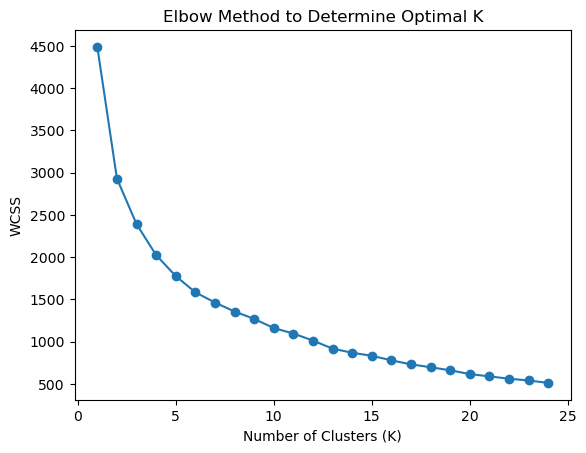

In [ ]:
wcss = []  # Within-cluster sum of squares

for k in range(1, 25):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=23, n_init=50)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 25), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=6, random_state=23, n_init=50)
data['cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
print(data.groupby('cluster').mean())

         Pageviews         G        GS       Cmp     PaAtt      Cmp%  \
cluster                                                                
0         1.532081  2.302467  4.269977  2.447049  2.467271  0.257386   
1         1.569235  0.034826  0.040154  0.006776  0.003646  0.286956   
2         0.217340  0.699581  1.230153  0.649281  0.638135  0.294617   
3        -1.658232 -0.633655 -1.151170 -0.625201 -0.621646 -0.242462   
4        19.066973  1.108972  2.223199  1.508189  1.431450  0.468811   
5         5.219181  2.091760  3.845174  1.947993  1.938703  0.282521   

            PaYds      PaTD      IntO      Rate  ...  Blck      APYd  RetYds  \
cluster                                          ...                           
0        2.407086  2.154952  2.652357  0.494499  ...   0.0  0.156157     0.0   
1        0.003467 -0.036270  0.053920  0.445273  ...   0.0 -0.030491     0.0   
2        0.623099  0.548830  0.594622  0.516418  ...   0.0  1.067866     0.0   
3       -0.621155 -0.59

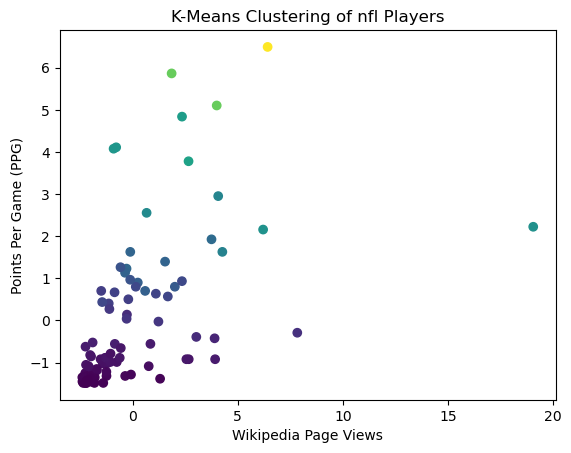

In [ ]:
plt.scatter(data['Pageviews'], data['GS'], c=data['FantPts'], cmap='viridis')
plt.xlabel('Wikipedia Page Views')
plt.ylabel('Points Per Game (PPG)')
plt.title('K-Means Clustering of nfl Players')
plt.show()

In [ ]:
# data['cluster'] = kmeans.fit_predict(data)

In [ ]:
for cluster in sorted(data['cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(df.loc[data[data['cluster'] == cluster].index][['Player_df2_x', 'Pageviews']].head(10)) 


Cluster 0:
          Player_df2_x  Pageviews
77        Kirk Cousins  1954297.0
267        Andy Dalton   614065.0
681         Jared Goff  2484695.0
942         Joe Flacco  1837630.0
1219  Matthew Stafford  1651689.0
1485        Derek Carr   659939.0

Cluster 1:
          Player_df2_x  Pageviews
207  Mitchell Trubisky   527135.0
268        Bryce Young  1272624.0
340     Caleb Williams  1957667.0
409         Joe Burrow  1709446.0
545     Jameis Winston  1534433.0
620             Bo Nix  1915568.0
735  Teddy Bridgewater   631160.0
755        Jordan Love  2093051.0
815       C. J. Stroud  2420430.0
957    Trevor Lawrence   877527.0

Cluster 2:
        Player_df2_x  Pageviews
0       Kyler Murray   845475.0
475   Deshaun Watson  1046778.0
552     Dak Prescott  1204306.0
1080    Carson Wentz   912185.0
1157  Justin Herbert   819186.0
1407    Daniel Jones  1010659.0
1629    Tyrod Taylor   409888.0
1700     Jalen Hurts  1178019.0
1914      Geno Smith   737415.0
1977  Baker Mayfield  2364839.0


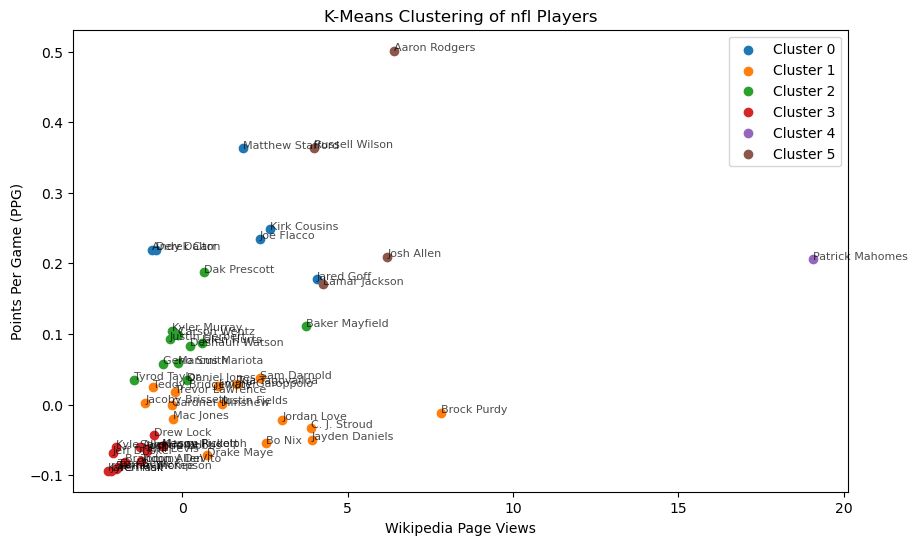

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Scatter plot
for cluster in sorted(data['cluster'].unique()):
    subset = data[data['cluster'] == cluster].tail(15)
    names = df.loc[data[data['cluster'] == cluster].index].tail(15)
    plt.scatter(subset['Pageviews'], subset['FantPts'], label=f'Cluster {cluster}')

    # Annotate player names
    for index, row in subset.iterrows():
        plt.annotate(df.loc[index]['Player_df2_x'], (row['Pageviews'], row['FantPts']), fontsize=8, alpha=0.7)

# # Annotate player names
# for _, row in df.iterrows():
#     plt.annotate(row['Player'], (row['Pageviews'], row['PTS']), fontsize=8, alpha=0.7)


plt.xlabel("Wikipedia Page Views")
plt.ylabel("Points Per Game (PPG)")
plt.title("K-Means Clustering of nfl Players")
plt.legend()
plt.show()

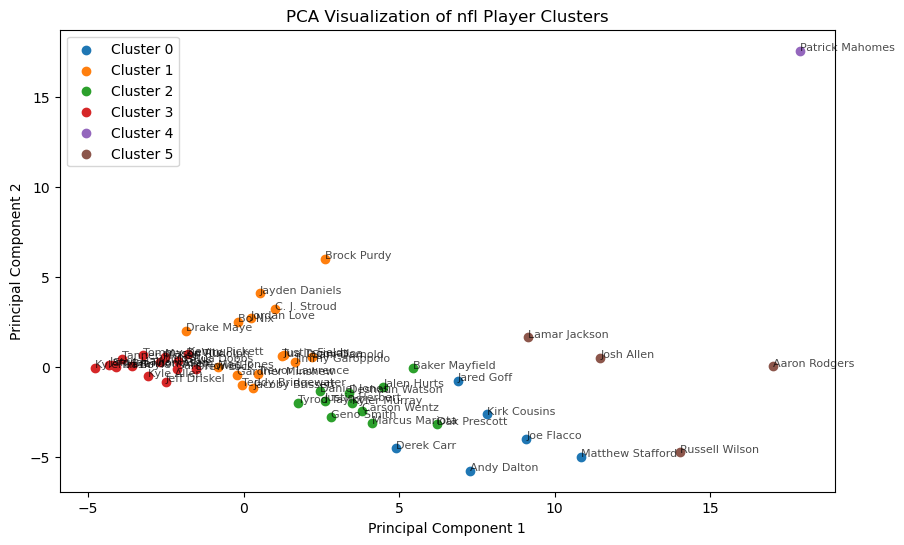

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Apply PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_features)

# Add PCA results to DataFrame
data['PCA1'] = X_pca[:, 0]
data['PCA2'] = X_pca[:, 1]

# Plot the PCA results
plt.figure(figsize=(10, 6))

# Scatter plot for each cluster
for cluster in sorted(data['cluster'].unique()):
    # subset = data[data['cluster'] == cluster]
    subset = data[data['cluster'] == cluster].tail(15)
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}')

    # Annotate player names
    for index, row in subset.iterrows():
        plt.annotate(df.loc[index]['Player_df2_x'], (row['PCA1'], row['PCA2']), fontsize=8, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of nfl Player Clusters")
plt.legend()
plt.show()


In [ ]:
# plt.figure(figsize=(10, 6))

# color_list = [
#     "blue",
#     "orange",
#     "green",
#     "red",
#     "purple",
#     "brown",
#     "pink",
#     "gray",
#     "lime",
#     "cyan"
# ]

# for cluster_num in range(10):

#     subset = data[data['cluster'] == cluster_num].tail(15)

#     # plt.scatter(subset['Pageviews'], subset['FantPts'], label=f"Cluster {cluster_num}", c=cluster_num)
#     plt.scatter(subset['Pageviews'], subset['FantPts'], label=f"Cluster {cluster_num}", color=color_list[cluster_num])

#     for index, row in subset.iterrows():
#         plt.annotate(df.loc[index]['Player_df2_x'], (row['Pageviews'], row['FantPts']), fontsize=8, alpha=0.7)

#     plt.xlabel("Wikipedia Page Views")
#     plt.ylabel("Points Per Game (PPG)")
#     plt.title(f"Cluster {cluster_num}: K-Means Clustering of nfl Players")
#     plt.legend()
#     plt.show()

In [ ]:
data_w_names = pd.merge(data, df["Player_df2_x"], left_index=True, right_index=True, how="inner")

In [ ]:
cluster_means = data.groupby('cluster')[data.columns].median()
# cluster_means = data.groupby('cluster')[['FantPts', 'AST_PerGame', 'TRB_PerGame', 'Pageviews']].median()
print(cluster_means)

         Pageviews         G        GS       Cmp     PaAtt      Cmp%  \
cluster                                                                
0         2.093797  2.216338  4.093435  2.331183  2.257080  0.260343   
1         1.376099  0.066201  0.088151  0.074090  0.076537  0.224859   
2        -0.123012  0.758305  1.130849  0.628164  0.616836  0.273650   
3        -1.916855 -0.681271 -1.302113 -0.691874 -0.686761 -0.010221   
4        19.066973  1.108972  2.223199  1.508189  1.431450  0.468811   
5         5.232602  1.902584  3.630014  1.767118  1.777231  0.309133   

            PaYds      PaTD      IntO      Rate  ...       MVP       OPOY  \
cluster                                          ...                        
0        2.266648  1.960423  2.635484  0.519615  ... -0.238822  -0.146760   
1        0.009415 -0.071702 -0.034663  0.333761  ... -0.238822  -0.146760   
2        0.600473  0.480619  0.534800  0.479430  ... -0.238822  -0.146760   
3       -0.691142 -0.650076 -0.654745 

In [ ]:
from scipy.spatial.distance import euclidean

# Find the centroid of the most "popular" cluster (highest Pageviews)
superstar_cluster = cluster_means['Pageviews'].idxmax()
superstar_centroid = cluster_means.loc[superstar_cluster].values

# Compute distance of each player from the superstar cluster
data_w_names['Obscurity_Score'] = data_w_names.apply(
    lambda row: euclidean(
        row[cluster_means.columns].values,
        # row[['FantPts', 'AST_PerGame', 'TRB_PerGame', 'Pageviews']].values,
        superstar_centroid
    ), axis=1
)

In [ ]:
# from scipy.spatial.distance import mahalanobis
# import numpy as np

# # Select only the relevant feature columns
# feature_cols = ['FantPts', 'AST_PerGame', 'TRB_PerGame', 'Pageviews']

# # Compute covariance matrix and inverse
# cov_matrix = np.cov(cluster_means[feature_cols].T)
# inv_cov_matrix = np.linalg.inv(cov_matrix)

# # Find the centroid of the most "popular" cluster (highest Pageviews)
# superstar_cluster = cluster_means['Pageviews'].idxmax()
# superstar_centroid = cluster_means.loc[superstar_cluster, feature_cols].values  # Explicitly select feature columns

# # Compute Mahalanobis distance for each player
# data_w_names['Obscurity_Score'] = data_w_names.apply(
#     lambda row: mahalanobis(row[feature_cols].values, superstar_centroid, inv_cov_matrix),
#     axis=1
# )

In [ ]:
# from scipy.spatial.distance import euclidean
# from sklearn.preprocessing import MinMaxScaler

# # Select key performance metrics for defining "superstar" cluster
# performance_metrics = ['FantPts', 'AST_PerGame', 'TRB_PerGame', 'Pageviews', 'PTS', 'AST']

# # Normalize the data so no single stat dominates
# scaler = MinMaxScaler()
# normalized_means = cluster_means[performance_metrics].copy()
# normalized_means[performance_metrics] = scaler.fit_transform(normalized_means[performance_metrics])

# # Define superstar cluster as the one with the highest sum of normalized scores
# superstar_cluster = normalized_means.sum(axis=1).idxmax()

# # Get centroid of the superstar cluster
# superstar_centroid = cluster_means.loc[superstar_cluster, performance_metrics].values

# # Compute distance of each player from the superstar cluster
# data_w_names['Obscurity_Score'] = data_w_names.apply(
#     lambda row: euclidean(row[performance_metrics].values, superstar_centroid),
#     axis=1
# )

# # Lower 'Obscurity_Score' means more similar to superstars


In [ ]:
# import numpy as np

# # Apply log transform to high-variance features (like Pageviews)
# log_features = ['Pageviews']
# # data_w_names[log_features] = np.log1p(data_w_names[log_features])
# cluster_means[log_features] = np.log1p(cluster_means[log_features] + 1)

In [ ]:
# from sklearn.decomposition import PCA
# from scipy.spatial.distance import euclidean

# # Select performance-related features
# features = ['FantPts', 'AST_PerGame', 'TRB_PerGame', 'Pageviews', 'PTS', 'AST']

# # Apply PCA
# pca = PCA(n_components=1)  # Reduce to a single performance component
# pca_scores = pca.fit_transform(cluster_means[features])

# # Identify cluster with highest PCA score (most superstar-like)
# superstar_cluster = pca_scores.argmax()
# superstar_centroid = cluster_means.iloc[superstar_cluster][features].values

# # Compute Obscurity Score based on PCA-defined superstars
# data_w_names['Obscurity_Score'] = data_w_names.apply(
#     lambda row: euclidean(row[features].values, superstar_centroid),
#     axis=1
# )


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 100))
data_w_names['Obscurity_Score'] = scaler.fit_transform(data_w_names[['Obscurity_Score']])

# Higher score = More obscure player
data_w_names = data_w_names.sort_values(by='Obscurity_Score', ascending=False)


In [ ]:
print(data_w_names[['Player_df2_x', 'Pageviews', 'FantPts', 'Obscurity_Score']].head(50))

                  Player_df2_x  Pageviews   FantPts  Obscurity_Score
156           Malik Cunningham  -2.364234 -0.093743       100.000000
1017            Chris Oladokun  -2.276922 -0.093682        99.170300
2043                Kyle Trask  -2.235788 -0.093657        97.886943
1                 Clayton Tune  -2.400697 -0.093078        97.315014
551                 Will Grier  -2.174115 -0.093583        96.873472
754              Sean Clifford  -2.205599 -0.093583        96.651798
1486               Ben DiNucci  -2.226694 -0.092880        96.510196
1912                Jaren Hall  -2.156090 -0.093484        96.354642
1487               Jake Haener  -1.967483 -0.092116        96.251894
208                 Mike White  -2.268728 -0.080948        96.251894
1764           Skylar Thompson  -2.003995 -0.090612        96.003140
1608                 Tim Boyle  -1.945096 -0.088061        96.002118
941               Sam Ehlinger  -2.201870 -0.089244        95.941744
1215              Easton Stick  -2

In [ ]:
df_combined = players.join(data_w_names["Obscurity_Score"], how='inner')  # 'inner', 'left', 'right', or 'outer'

In [ ]:
def scale_obscurity(obscurity_score):
    if obscurity_score <= 70:
        return 0  # Set all values ≤ 70 to zero
    else:
        return ((obscurity_score - 70) / (100 - 70)) * 99 + 1  # Scale from 1 to 100

In [ ]:
def scale_obscurity_exp(score):
    if score <= 70:
        return 0
    return (np.exp((score - 70) / 10) - 1) * (99 / (np.exp(2.5) - 1))  # More weight to higher values

In [ ]:
import numpy as np

def scale_obscurity_sigmoid(score):
    if score <= 70:
        return 0  # Set values ≤ 70 to zero
    return 99 / (1 + np.exp(-0.2 * (score - 85)))  # Sigmoid curve with center at 85

In [ ]:
df_combined['Obscurity_Score_Scaled'] = df_combined['Obscurity_Score'].apply(scale_obscurity_exp)

In [ ]:
df_combined.sort_values(by='Obscurity_Score', ascending=False)[["Player", "Obscurity_Score_Scaled"]].tail(30)

,Player,Obscurity_Score_Scaled
268,Bryce Young,35.820008
1157,Justin Herbert,34.490472
0,Kyler Murray,34.187178
1407,Daniel Jones,29.768599
1080,Carson Wentz,26.242753
475,Deshaun Watson,25.514275
1814,Justin Fields,25.266706
552,Dak Prescott,24.498305
340,Caleb Williams,22.232147
620,Bo Nix,21.628285


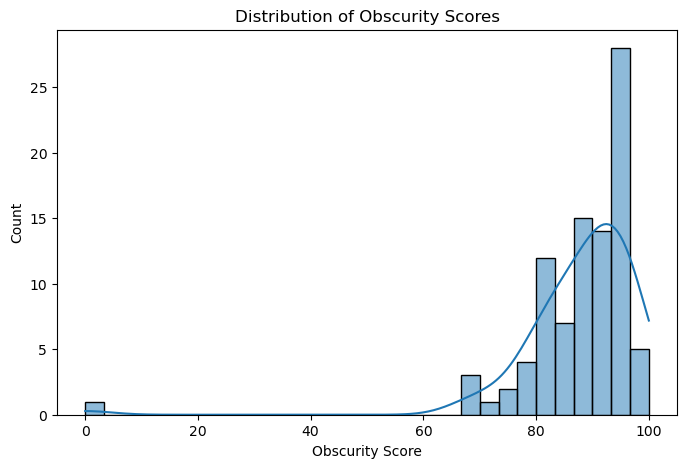

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_combined['Obscurity_Score'], bins=30, kde=True)
plt.xlabel("Obscurity Score")
plt.ylabel("Count")
plt.title("Distribution of Obscurity Scores")
plt.show()


In [ ]:
df_combined.to_csv("../nfl_locked.csv")

In [ ]:
data.loc[data_w_names[data_w_names["Player_df2_x"] == "Bronny James"].index].T

""
Pageviews
G
GS
Cmp
PaAtt
Cmp%
PaYds
PaTD
IntO
Rate


In [ ]:
data_w_names[data_w_names["Player_df2_x"] == "Bronny James"].T

""
Pageviews
G
GS
Cmp
PaAtt
Cmp%
PaYds
PaTD
IntO
Rate
